# --- Exploratory Data Analysis (EDA) ---

In [2]:
#Importanciones de las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar los datos
df_visits = pd.read_csv('../data/raw/visits_log_us.csv')
df_orders = pd.read_csv('../data/raw/orders_log_us.csv')
df_costs = pd.read_csv('../data/raw/costs_us.csv')

### EDA VISITS

In [4]:
print("\nInformación general:")
df_visits.info()


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
print("\nValores nulos por columna:")
print(df_visits.isnull().sum())

print("\nNúmero de filas duplicadas:", df_visits.duplicated().sum())


Valores nulos por columna:
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Número de filas duplicadas: 0


In [6]:
# Convertir columnas de tiempo a datetime
df_visits.columns= [columna.lower().replace(' ', '_') for columna in df_visits.columns]
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])

In [7]:
# Detección de outliers en session_duration
visits = df_visits.copy()
visits['session_duration'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.total_seconds() 

Q1 = visits['session_duration'].quantile(0.25)
Q3 = visits['session_duration'].quantile(0.75)
IQR = Q3 - Q1
outliers_visits = df_visits[(visits['session_duration'] < Q1 - 1.5 * IQR) | 
                            (visits['session_duration'] > Q3 + 1.5 * IQR)]
print(f"\nOutliers en session_duration: {len(outliers_visits)}")


Outliers en session_duration: 24658


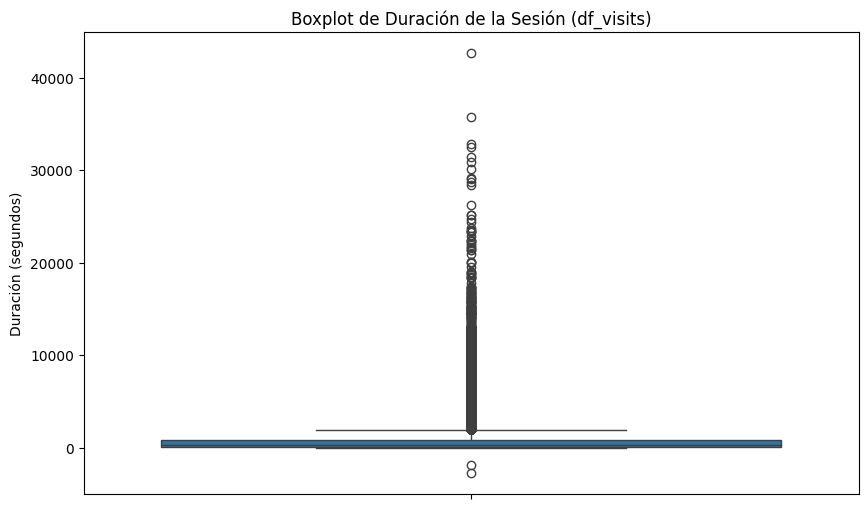

In [8]:
# Boxplot de duración de sesiones
plt.figure(figsize=(10, 6))
sns.boxplot(y=visits['session_duration'])
plt.title('Boxplot de Duración de la Sesión (df_visits)')
plt.ylabel('Duración (segundos)')
plt.show()

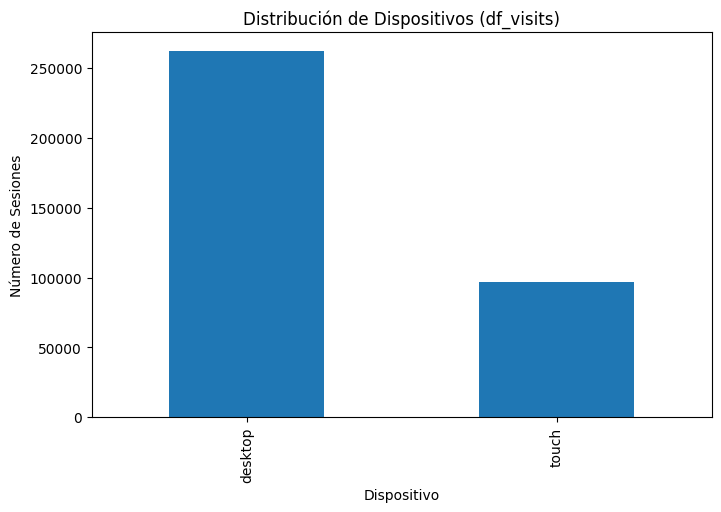

In [9]:
# Distribución de dispositivos
plt.figure(figsize=(8, 5))
df_visits['device'].value_counts().plot(kind='bar')
plt.title('Distribución de Dispositivos (df_visits)')
plt.xlabel('Dispositivo')
plt.ylabel('Número de Sesiones')
plt.show()

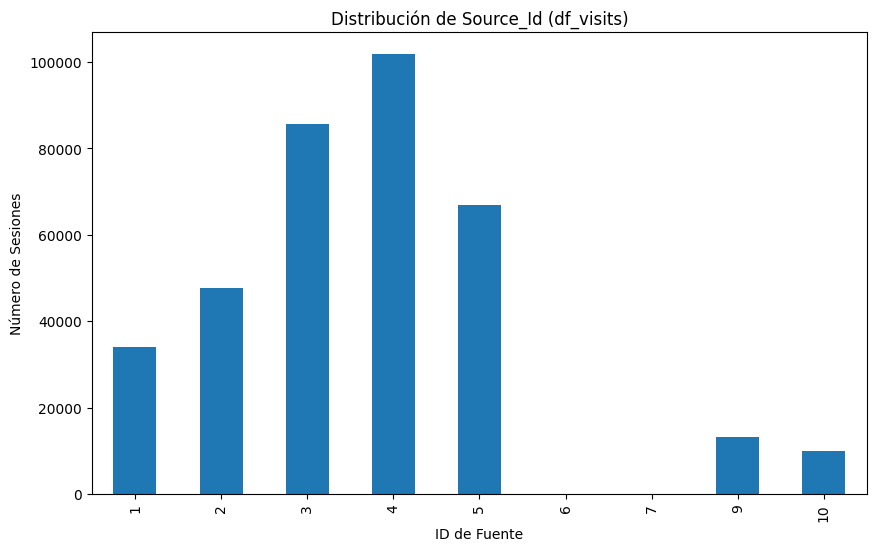

In [10]:
# Distribución de fuentes
plt.figure(figsize=(10, 6))
df_visits['source_id'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Source_Id (df_visits)')
plt.xlabel('ID de Fuente')
plt.ylabel('Número de Sesiones')
plt.show()

### EDA ORDERS

In [11]:
# Información general
print("\nInformación general:")
df_orders.info()


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [12]:
# Valores nulos y duplicados
print("\nValores nulos por columna:")
print(df_orders.isnull().sum())

print("\nNúmero de filas duplicadas:", df_orders.duplicated().sum())


Valores nulos por columna:
Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Número de filas duplicadas: 0


In [13]:
# Convertir columnas de tiempo
df_orders.columns= [columna.lower().replace(' ', '_') for columna in df_orders.columns]
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])

In [14]:
# Detección de outliers en revenue
Q1 = df_orders['revenue'].quantile(0.25)
Q3 = df_orders['revenue'].quantile(0.75)
IQR = Q3 - Q1
outliers_orders = df_orders[(df_orders['revenue'] < Q1 - 1.5 * IQR) | 
                            (df_orders['revenue'] > Q3 + 1.5 * IQR)]
print(f"\nOutliers en revenue: {len(outliers_orders)}")


Outliers en revenue: 3990


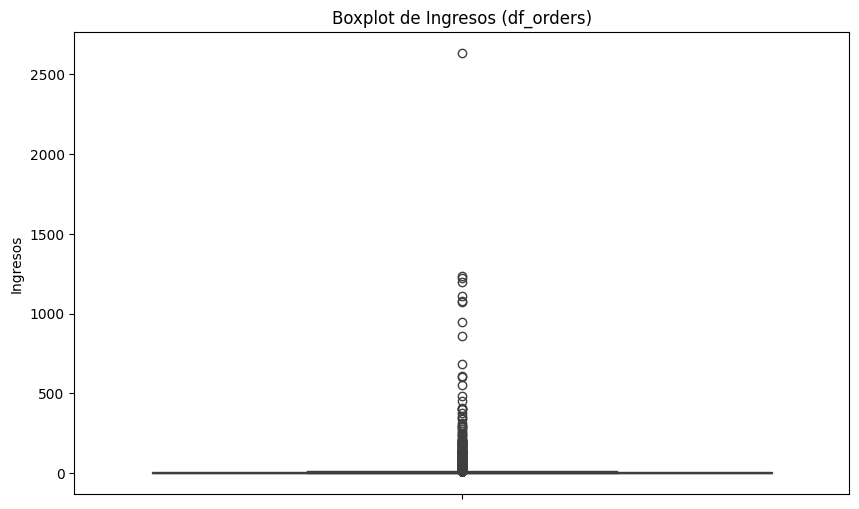

In [15]:
# Boxplot de ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_orders['revenue'])
plt.title('Boxplot de Ingresos (df_orders)')
plt.ylabel('Ingresos')
plt.show()

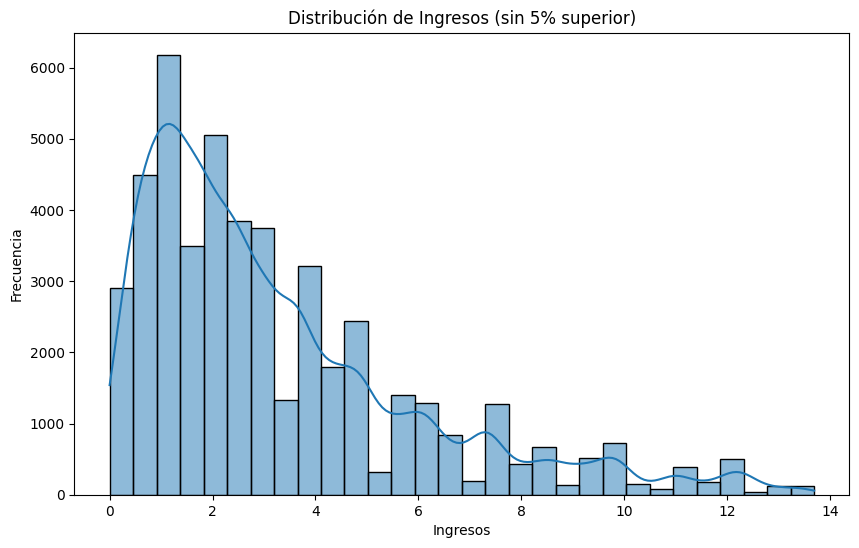

In [16]:
# Histograma de ingresos sin top 5%
plt.figure(figsize=(10, 6))
sns.histplot(df_orders[df_orders['revenue'] < df_orders['revenue'].quantile(0.95)]['revenue'], bins=30, kde=True)
plt.title('Distribución de Ingresos (sin 5% superior)')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

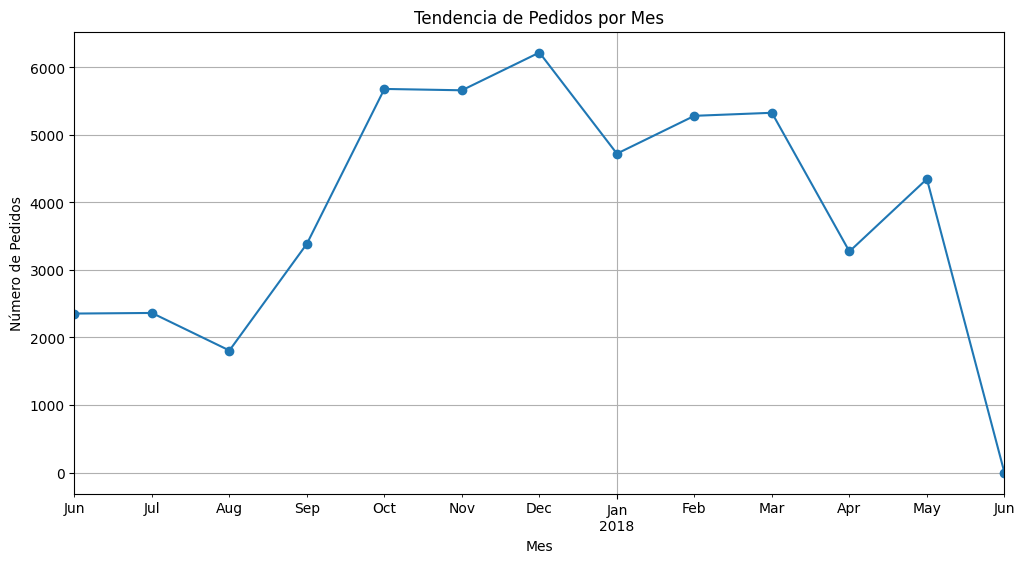

In [17]:
# Tendencia temporal de pedidos
df_orders['order_month'] = df_orders['buy_ts'].dt.to_period('M')
plt.figure(figsize=(12, 6))
df_orders['order_month'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Tendencia de Pedidos por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

### EDA COSTS

In [18]:
# Información general
print("\nInformación general:")
df_costs.info()


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [19]:
# Valor nulos y duplicados
print("\nValores nulos por columna:")
print(df_costs.isnull().sum())

print("\nNúmero de filas duplicadas:", df_costs.duplicated().sum())


Valores nulos por columna:
source_id    0
dt           0
costs        0
dtype: int64

Número de filas duplicadas: 0


In [20]:
# Convertir columna de tiempo
df_costs.columns= [columna.lower().replace(' ', '_') for columna in df_costs.columns]
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

In [21]:

# Detección de outliers en costs
Q1 = df_costs['costs'].quantile(0.25)
Q3 = df_costs['costs'].quantile(0.75)
IQR = Q3 - Q1
outliers_costs = df_costs[(df_costs['costs'] < Q1 - 1.5 * IQR) | 
                          (df_costs['costs'] > Q3 + 1.5 * IQR)]
print(f"\nOutliers en costs: {len(outliers_costs)}")


Outliers en costs: 189


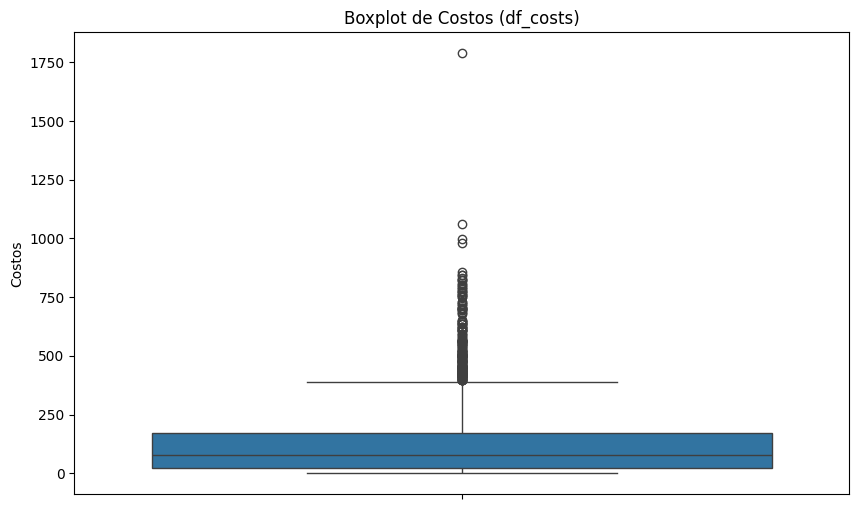

In [22]:
# Boxplot de costos
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_costs['costs'])
plt.title('Boxplot de Costos (df_costs)')
plt.ylabel('Costos')
plt.show()

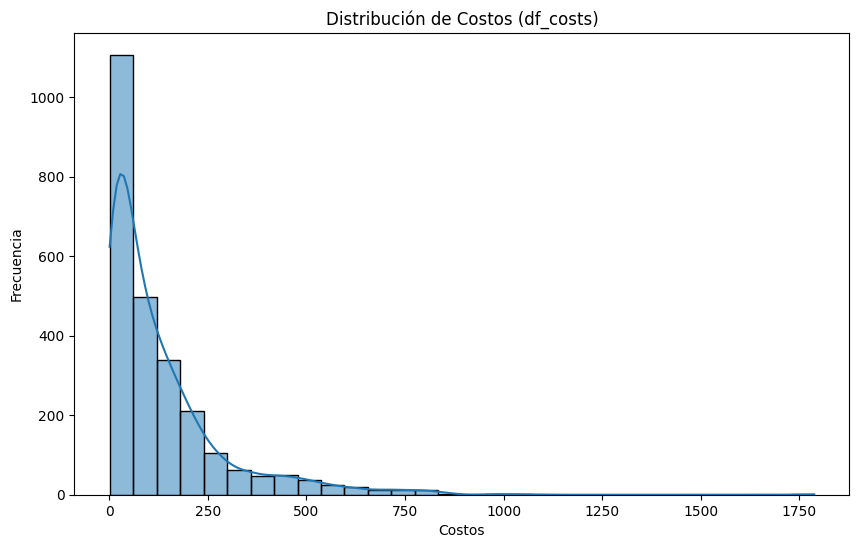

In [23]:
# Histograma de costos
plt.figure(figsize=(10, 6))
sns.histplot(df_costs['costs'], bins=30, kde=True)
plt.title('Distribución de Costos (df_costs)')
plt.xlabel('Costos')
plt.ylabel('Frecuencia')
plt.show()

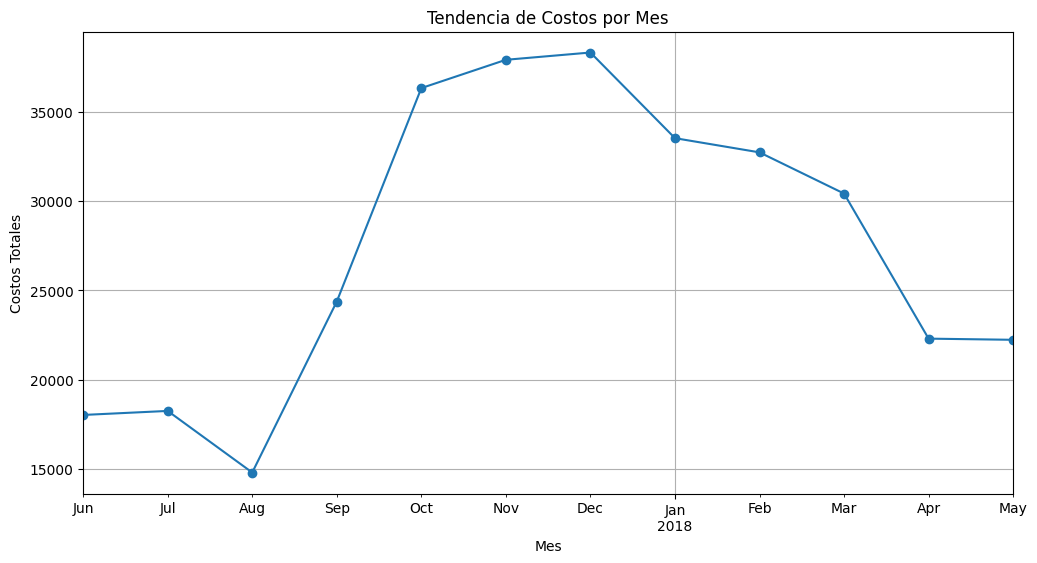

In [24]:
# Tendencia de costos por mes
df_costs['cost_month'] = df_costs['dt'].dt.to_period('M')
costs_by_month = df_costs.groupby('cost_month')['costs'].sum()
plt.figure(figsize=(12, 6))
costs_by_month.plot(kind='line', marker='o')
plt.title('Tendencia de Costos por Mes')
plt.xlabel('Mes')
plt.ylabel('Costos Totales')
plt.grid(True)
plt.show()

In [25]:
# Estandarizar nombres de columnas: minúsculas y reemplazar espacios por guiones bajos
df_visits.columns = [col.lower().replace(' ', '_') for col in df_visits.columns]
df_orders.columns = [col.lower().replace(' ', '_') for col in df_orders.columns]
df_costs.columns = [col.lower().replace(' ', '_') for col in df_costs.columns]

# Convertir columnas temporales a tipo datetime
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

# Guardar los archivos limpios en la carpeta 'processed'
df_visits.to_csv('../data/processed/visits_clean.csv', index=False)
df_orders.to_csv('../data/processed/orders_clean.csv', index=False)
df_costs.to_csv('../data/processed/costs_clean.csv', index=False)

### Estrategia de limpieza de datos

Durante el análisis exploratorio no se identificaron valores nulos ni filas duplicadas en los datasets `df_visits`, `df_orders` y `df_costs`. Por esta razón, **no fue necesaria ninguna estrategia de imputación ni eliminación de registros**.

Asimismo, aunque se detectaron **outliers significativos** en variables como `session_duration` (24,658 registros), `revenue` (3,990 registros) y `costs` (189 registros), **estos valores no fueron eliminados ni transformados**, ya que representan **comportamientos reales de usuarios o campañas publicitarias relevantes**. Su presencia puede ser clave para identificar patrones de alto valor o picos de inversión que impactan directamente métricas como el Lifetime Value (LTV) o el Customer Acquisition Cost (CAC).

La única transformación aplicada fue la **conversión de columnas de fecha al tipo `datetime`**, lo cual permite realizar análisis temporales precisos y cálculos como duración de sesiones, estacionalidad de compras y evolución de costos en el tiempo.
